# Neural Network Project
- Amirhossein Najafizadeh
- 9831065

## Part One (convolutional neural network)
In this part, we are going to get the CIFAR-10 dataset and create a 
convolutional nerual network for classifying its images.

### Imports

In [20]:
# tensorflow
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
# imageio
import imageio
# imagaug
import imgaug as ia
import imgaug.augmenters as iaa
# pandas
import pandas as pd

### Loading dataset

In [2]:
# loading our dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# check dataset
print(type(train_images))
print(train_images.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


### Parameters

In [4]:
# dataset class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Basic filters
First we build our model based on the following diagram:
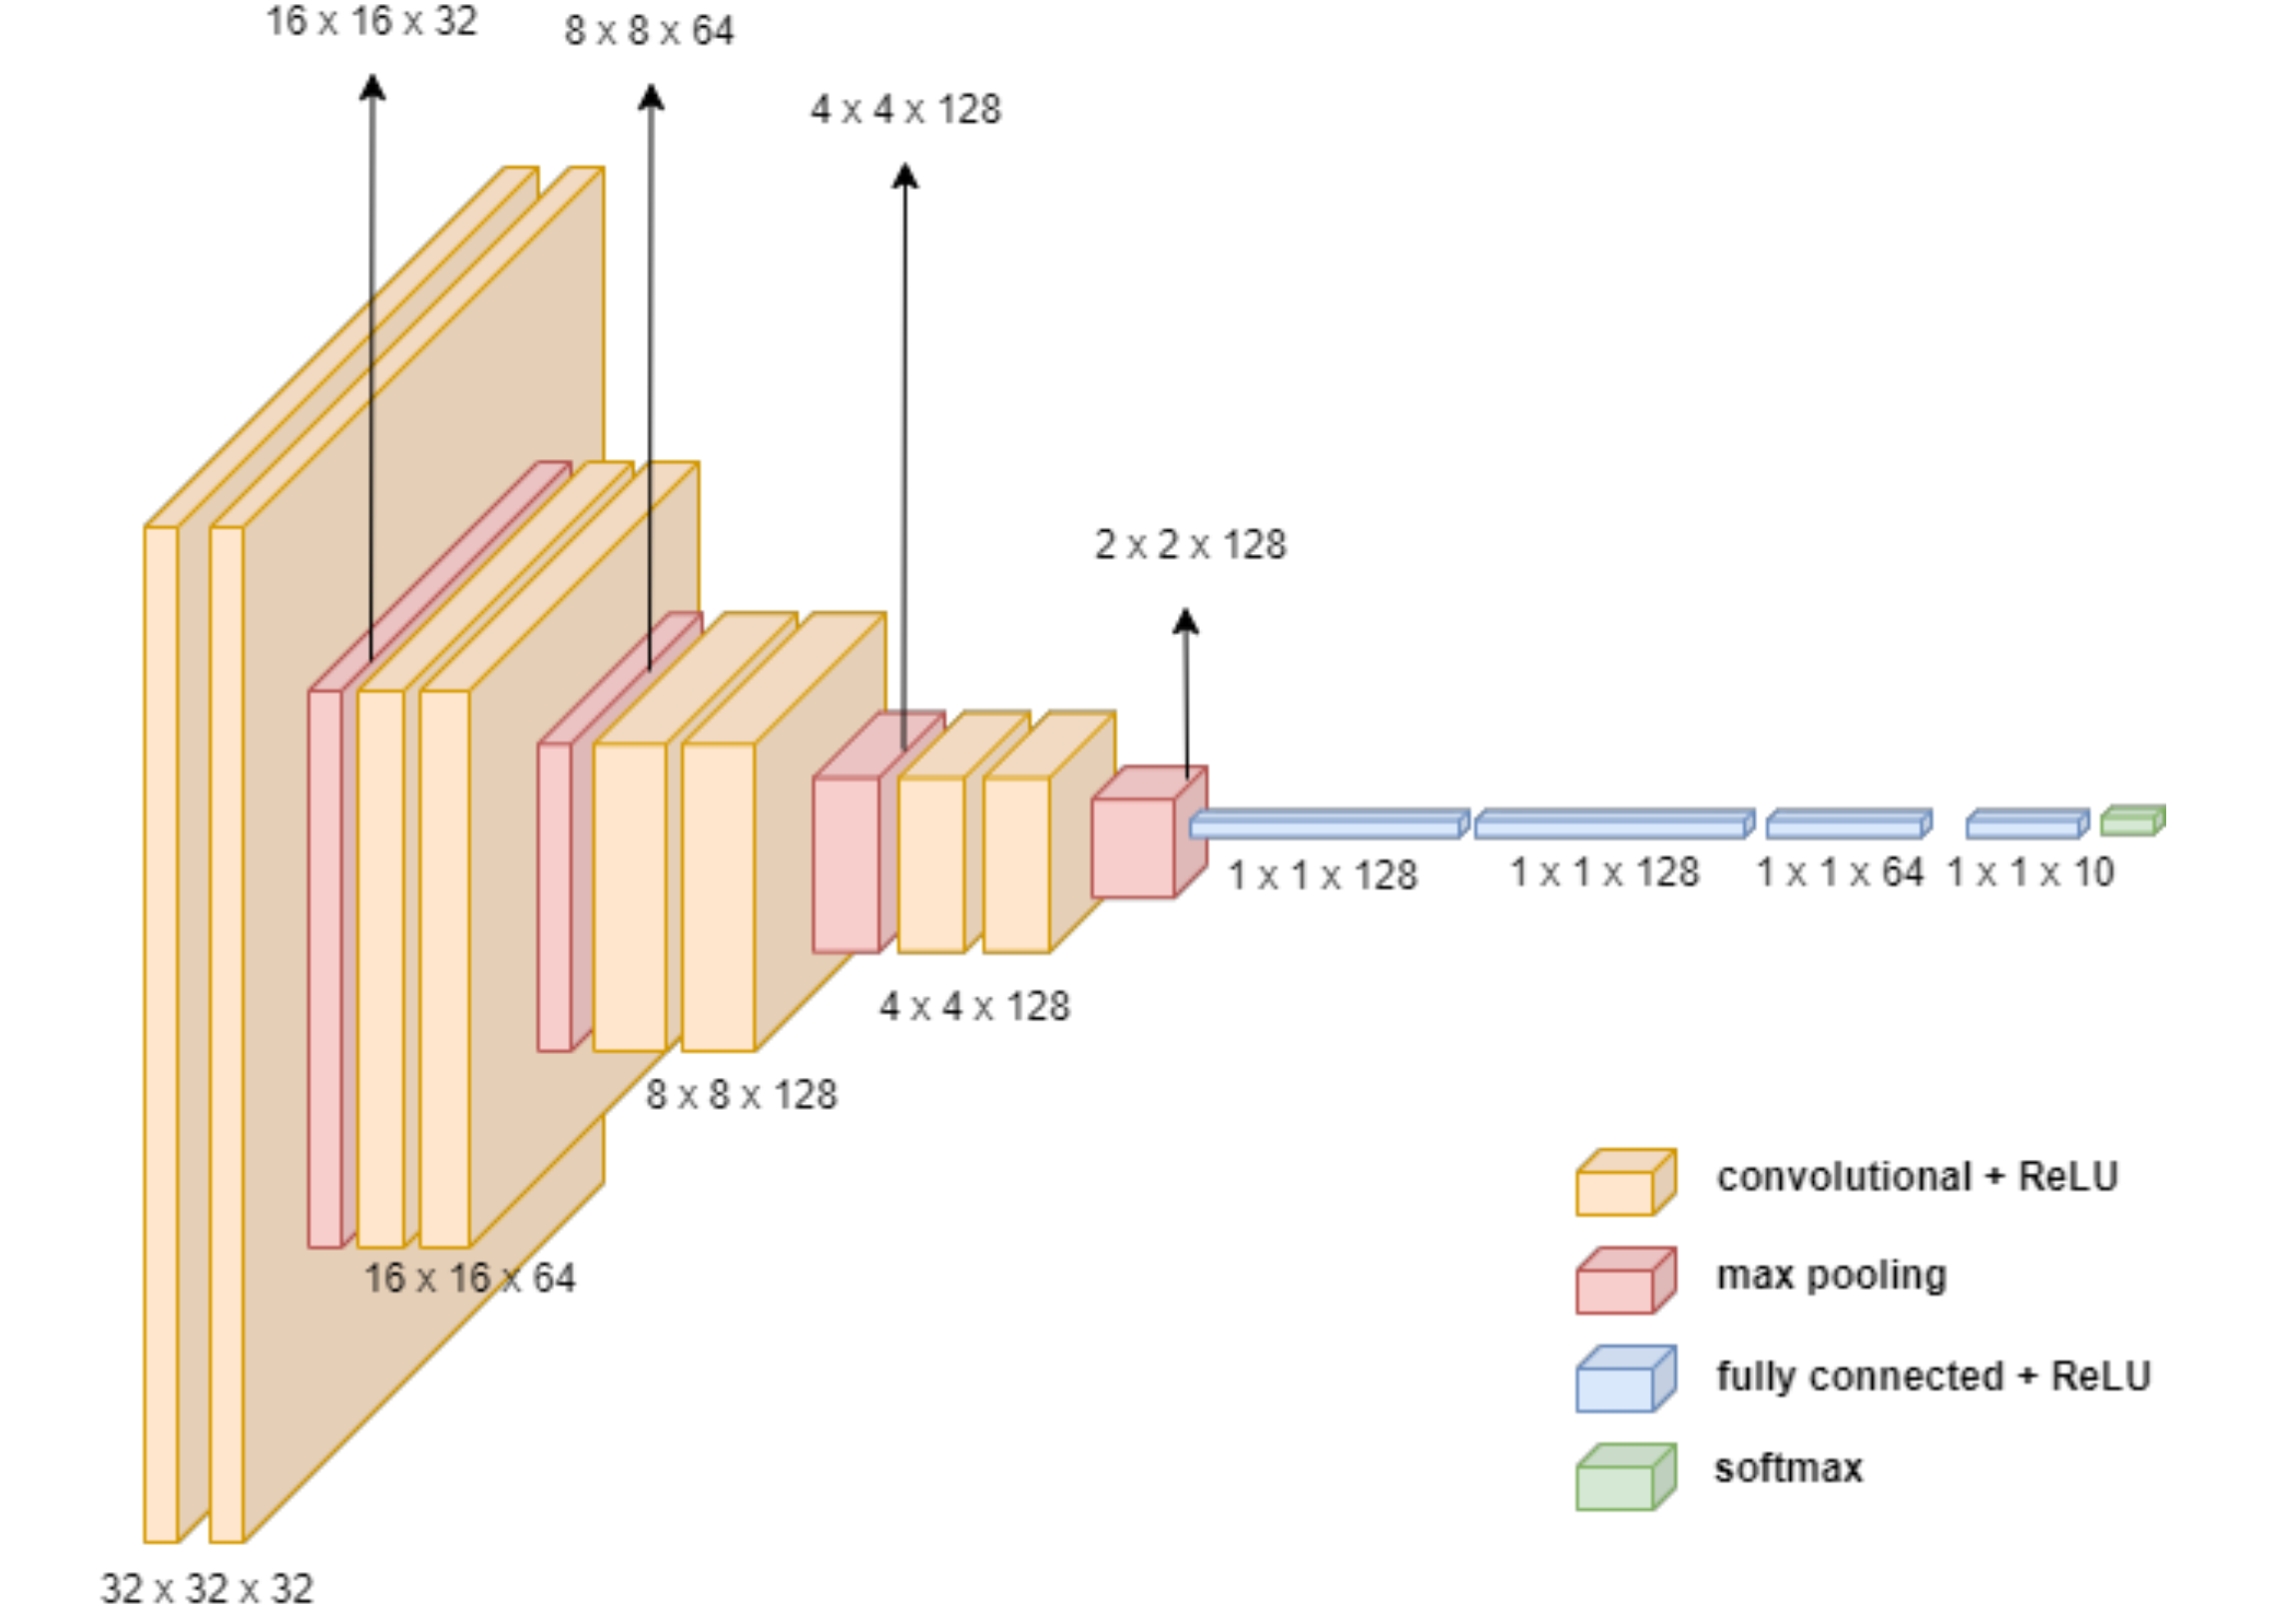

#### Model

In [5]:
# creating our model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),

    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax'),
])

In [6]:
# check our model validation
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

### Batch normalization
#### What is batch normalization?
Batch normalization solves a major problem called internal covariate shift. It helps by making the data flowing between intermediate layers of the neural network look, this means you can use a higher learning rate. It has a regularizing effect which means you can often remove dropout.

Batch normalization works best after the activation function.

In [8]:
# redefining our model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),

    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')
])

### Drop out
#### What is drop out?
Another typical characteristic of CNNs is a Dropout layer. The Dropout layer is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others.

In [37]:
# redefining our model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')
])

### Keras optimizers
Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

TensorFlow mainly supports 9 optimizer classes, consisting of algorithms like Adadelta, FTRL, NAdam, Adadelta, and many more.

- Adadelta: Optimizer that implements the Adadelta algorithm.
- Adagrad: Optimizer that implements the Adagrad algorithm.
- Adam: Optimizer that implements the Adam algorithm.
- Adamax: Optimizer that implements the Adamax algorithm.
- Ftrl: Optimizer that implements the FTRL algorithm.
- Nadam: Optimizer that implements the NAdam algorithm.
- Optimizer class: Base class for Keras optimizers.
- RMSprop: Optimizer that implements the RMSprop algorithm.
- SGD: Gradient descent (with momentum) optimizer.

##### adam

In [39]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [40]:
history = model.fit(train_images, train_labels, batch_size=50, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ValueError: ignored

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

##### nadam

In [ ]:
model.compile(optimizer='nadam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=50, epochs=25, validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

##### sgd

In [ ]:
model.compile(optimizer='sgd', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=50, epochs=25, validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### What is the best optimizer in keras?
Gradient Descent algorithm

The king of all the optimizers and it's very fast, robust, and flexible. A basic workflow of gradient descent follows the following steps: Calculate all the minor changes in each weight parameter affecting the loss function.

### Keras metrics
A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

#### F1
Definition: F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. In other words, an F1-score (from 0 to 9, 0 being lowest and 9 being the highest) is a mean of an individual's performance, based on two factors i.e. precision and recall.

#### Recall
This metric creates two local variables, true_positives and false_negatives, that are used to compute the recall. This value is ultimately returned as recall, an idempotent operation that simply divides true_positives by the sum of true_positives and false_negatives.

If sample_weight is None, weights default to 1. Use sample_weight of 0 to mask values.

If top_k is set, recall will be computed as how often on average a class among the labels of a batch entry is in the top-k predictions.

If class_id is specified, we calculate recall by considering only the entries in the batch for which class_id is in the label, and computing the fraction of them for which class_id is above the threshold and/or in the top-k predictions.

#### Precision
The metric creates two local variables, true_positives and false_positives that are used to compute the precision. This value is ultimately returned as precision, an idempotent operation that simply divides true_positives by the sum of true_positives and false_positives.

If sample_weight is None, weights default to 1. Use sample_weight of 0 to mask values.

If top_k is set, we'll calculate precision as how often on average a class among the top-k classes with the highest predicted values of a batch entry is correct and can be found in the label for that entry.

If class_id is specified, we calculate precision by considering only the entries in the batch for which class_id is above the threshold and/or in the top-k highest predictions, and computing the fraction of them for which class_id is indeed a correct label.

Accuracy calculates the percentage of predicted values (yPred) that match with actual values (yTrue). For a record, if the predicted value is equal to the actual value, it is considered accurate. We then calculate Accuracy by dividing the number of accurately predicted records by the total number of records.

## Part Two
One of the problems in many projects related to artificial intelligence and data science is limited data or unbalanced number of data in each class. 

These problems cause the network to malfunction. One way to solve this problem is to use data augmentation in this section
You will get acquainted with it.

### Data augmentation
#### What is data augmentation?
Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. 

Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

Deep learning Convolutional Neural Networks(CNN) need a huge number of images for the model to be trained effectively. 
This helps to increase the performance of the model by generalizing better and thereby reducing overfitting. 
Most popular data sets for classification and object detection data sets have a few thousand to millions of images.

Generalizing refers to a model’s performance when evaluated on previously seen data during training against the test or validation data it has never seen before.

A CNN, due to its in-variance property, can classify objects even when visible in different sizes, orientations or different illumination. Hence, we can take the small dataset of images and transform the objects to different sizes by zooming in or zooming out, flipping them vertically or horizontally or changing the brightness whatever makes sense for the object. This way we create a rich, diverse data set with variations.

#### How to use data augmentation?
Image augmentation can be applied as a pre-processing step before we train the model or can be applied in real time.

##### Basic data augmentation techniques
- Flipping: flipping the image vertically or horizontally
- Rotation: rotates the image by a specified degree.
- Shearing: shifts one part of the image like a parallelogram
- Cropping: object appear in different positions in different proportions in the image
- Zoom in, Zoom out
- Changing brightness or contrast

#### Do we use data augmentation for testing dataset?
We use data augmentation only on training. Data augmentation is used to increase the size of training set and to get more different images.

### Creating 10 fake images from a base image

In [21]:
# selecting image
img = train_images[5]

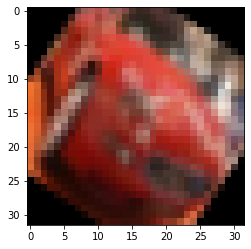

In [22]:
# 1 (rotate)
rotate = iaa.Affine(rotate=(-50, 50))
rotated_image = rotate.augment_image(img)
plt.imshow(rotated_image)

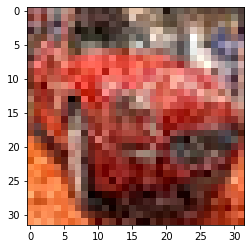

In [23]:
# 2 (noise image)
gaussian_noise = iaa.AdditiveGaussianNoise(10,20)
noise_image = gaussian_noise.augment_image(img)
plt.imshow(noise_image)

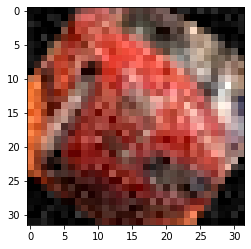

In [24]:
# 3 (rotate noise image)
rotated_noise_image = gaussian_noise.augment_image(rotated_image)
plt.imshow(rotated_noise_image)

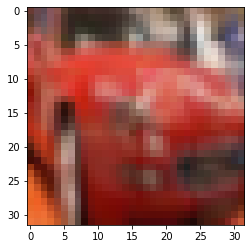

In [25]:
# 4 (crop image)
crop = iaa.Crop(percent=(0, 0.3))
corp_image = crop.augment_image(img)
plt.imshow(corp_image)

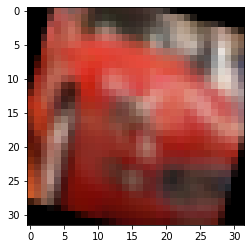

In [26]:
# 5 (crop rotate image)
crop_rotated_image = rotate.augment_image(corp_image)
plt.imshow(crop_rotated_image)

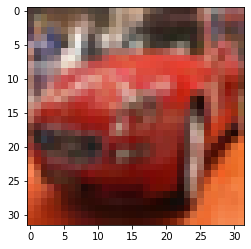

In [27]:
# 6 (flip image)
flip_hr = iaa.Fliplr(p=1.0)
flip_hr_image = flip_hr.augment_image(img)
plt.imshow(flip_hr_image)

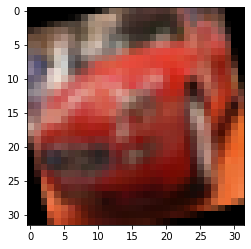

In [28]:
# 7 (flip rotate image)
flip_hr_rotated_image = rotate.augment_image(flip_hr_image)
plt.imshow(flip_hr_rotated_image)

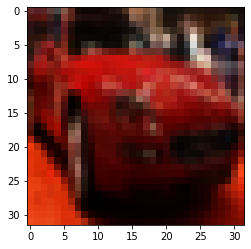

In [29]:
# 8 (dark image)
contrast = iaa.GammaContrast(gamma=2.0)
contrast_image = contrast.augment_image(img)
plt.imshow(contrast_image)

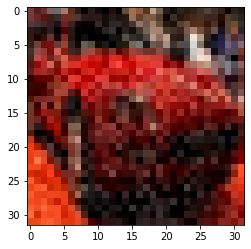

In [30]:
# 9 (noise dark image)
noise_dark_image = gaussian_noise.augment_image(contrast_image)
plt.imshow(noise_dark_image)

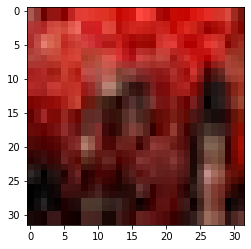

In [31]:
# 10 (flip crop noise dark image)
flip_crop_noise_dark_image = flip_hr.augment_image(crop.augment_image(noise_dark_image))
plt.imshow(flip_crop_noise_dark_image)